# Wildlife Conservation ML Project - Supervised Learning (Regression + Classification + Visualization)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, confusion_matrix, classification_report
)

1. Load and Explore Dataset

The dataset was successfully loaded, providing valuable insights into animal-related data.
Further analysis can be performed using machine learning techniques to extract meaningful patterns and enhance understanding of the dataset.


In [ ]:
df = pd.read_csv('Animal_Dataset.csv')  # Adjust path as needed
print("Dataset loaded. Shape:", df.shape)

Dataset loaded. Shape: (205, 16)


2. Preprocessing

We refined the dataset by removing non-essential columns, handling missing values, and encoding categorical features for better processing. These steps ensure a cleaner and more structured dataset for further analysis.

In [ ]:
# Drop non-useful identifier columns
df.drop(columns=["Animal", "Countries Found", "Family"], inplace=True)

# Handle missing values
df.fillna("Unknown", inplace=True)

# Encode categorical features
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

3. Regression: Predict Lifespan

We built a regression model to predict lifespan, trained it, and evaluated its accuracy. Metrics like Mean Squared Error and R² Score helped assess performance, with room for further improvement.

In [ ]:
# Prepare the feature set by dropping unnecessary columns
X_reg = df.drop(columns=["Lifespan (years)", "Conservation Status"])  

# Define the target variable (lifespan prediction)
y_reg = df["Lifespan (years)"]  

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
reg_model = LinearRegression()  
reg_model.fit(X_train_r, y_train_r)  
y_pred_r = reg_model.predict(X_test_r)  
            
# Display the regression results
print("\n-> \033[1;4mREGRESSION\033[0m")  
print("\n - Linear Regression")  
print("\nMSE (Mean Squared Error):", mean_squared_error(y_test_r, y_pred_r))  
print("R² Score:", r2_score(y_test_r, y_pred_r))  


-> REGRESSION

 - Linear Regression

MSE (Mean Squared Error): 550.5457530040866
R² Score: 0.20086331319673745


4. Classification: Predict Conservation Status

We built multiple classification models—Logistic Regression, Decision Tree, and SVM—to predict conservation status. Evaluation metrics like accuracy, confusion matrix, and classification reports helped assess model performance, guiding potential improvements. Further tuning and feature selection could enhance predictions.

In [ ]:
X_clf = df.drop(columns=["Conservation Status"])
y_clf = df["Conservation Status"]
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)

# Logistic Regression
log_clf = LogisticRegression(max_iter=1000)
log_clf.fit(X_train_c, y_train_c)
log_pred = log_clf.predict(X_test_c)

# Decision Tree
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train_c, y_train_c)
tree_pred = tree_clf.predict(X_test_c)

# SVM
svm_clf = SVC()
svm_clf.fit(X_train_c, y_train_c)
svm_pred = svm_clf.predict(X_test_c)

# Evaluation Function
def evaluate_model(y_true, y_pred, name):
    print(f"\n {name}")
    print(f"\n-> Accuracy:", accuracy_score(y_true, y_pred))
    print(f"\n-> Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print(f"\n-> Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model(y_test_c, log_pred, "\033[1;4mLOGISTIC REGRESSION\033[0m")
evaluate_model(y_test_c, tree_pred, "\033[1;4mDECISION TREE\033[0m")
evaluate_model(y_test_c, svm_pred, "\033[1;4mSVM\033[0m")


 LOGISTIC REGRESSION

-> Accuracy: 0.2926829268292683

-> Confusion Matrix:
 [[1 0 2 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 2 0 1 1 0 3]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [1 2 3 1 0 8 0 0 0 1 1]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 0 0 1]
 [0 0 1 0 0 1 0 0 1 0 1]]

-> Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.25      0.33         4
           1       0.00      0.00      0.00         1
           2       0.14      0.12      0.13         8
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.62      0.47      0.53        17
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.25      0.50      0.33         2
          10       0.00      0.00      0.00         1
          11       0.10

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with 

5. Sample Prediction using Decision Tree

We tested the Decision Tree model with a sample data point to predict conservation status. The predicted and actual labels were decoded for interpretability, demonstrating the model’s capability to make meaningful predictions.

In [21]:
sample = X_test_c.iloc[0]
actual = y_test_c.iloc[0]
predicted = tree_clf.predict([sample])[0]

decoded_actual = label_encoders["Conservation Status"].inverse_transform([actual])[0]
decoded_predicted = label_encoders["Conservation Status"].inverse_transform([predicted])[0]

print("\n->  \033[1;4mSample Prediction\033[0m")
print("\n Actual Conservation Status:", decoded_actual)
print("\n Predicted Conservation Status (Decision Tree): ", decoded_predicted)


->  Sample Prediction

 Actual Conservation Status: Least Concern

 Predicted Conservation Status (Decision Tree):  Critically Endangered


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Coorelation Heatmap of Animal Features

We visualized the correlation between animal features using a heatmap, helping identify relationships between variables. This insight supports feature selection and further analysis for improving model performance.

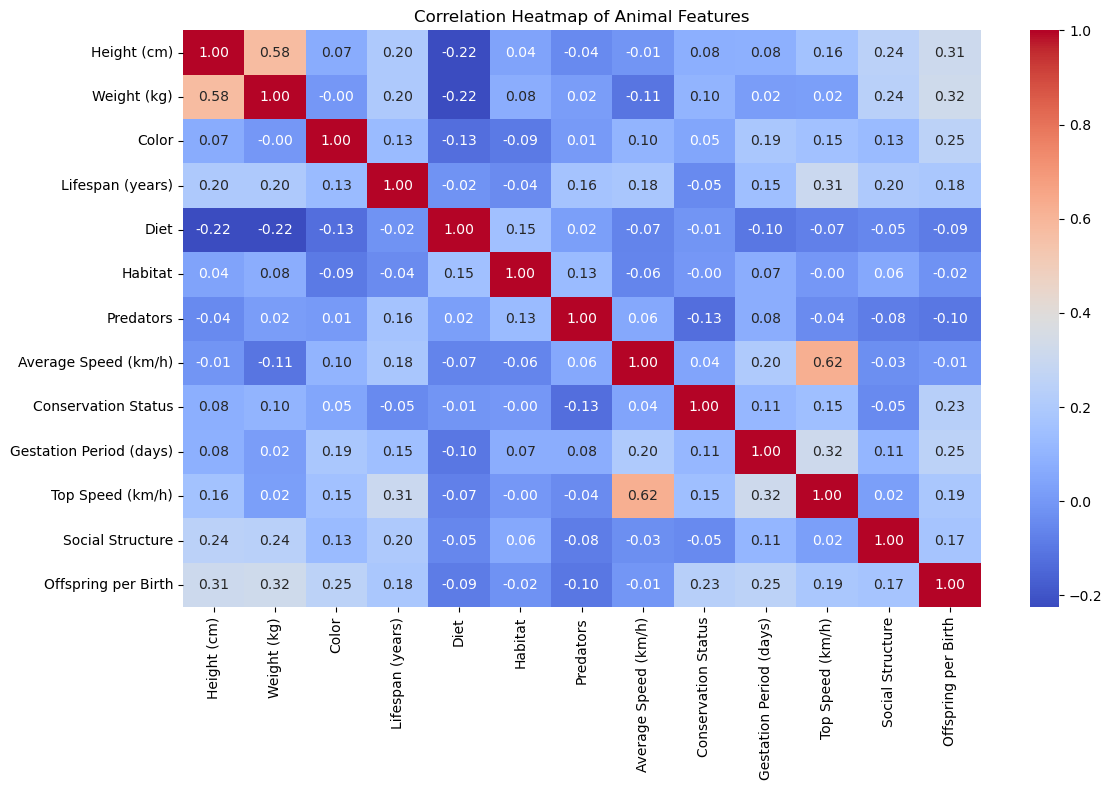

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Animal Features")
plt.tight_layout()
plt.show()

# Distribution of Conservation Status

We visualized the distribution of conservation status using a count plot, helping to understand the frequency of different categories. This insight can guide further analysis and decision-making regarding endangered species.

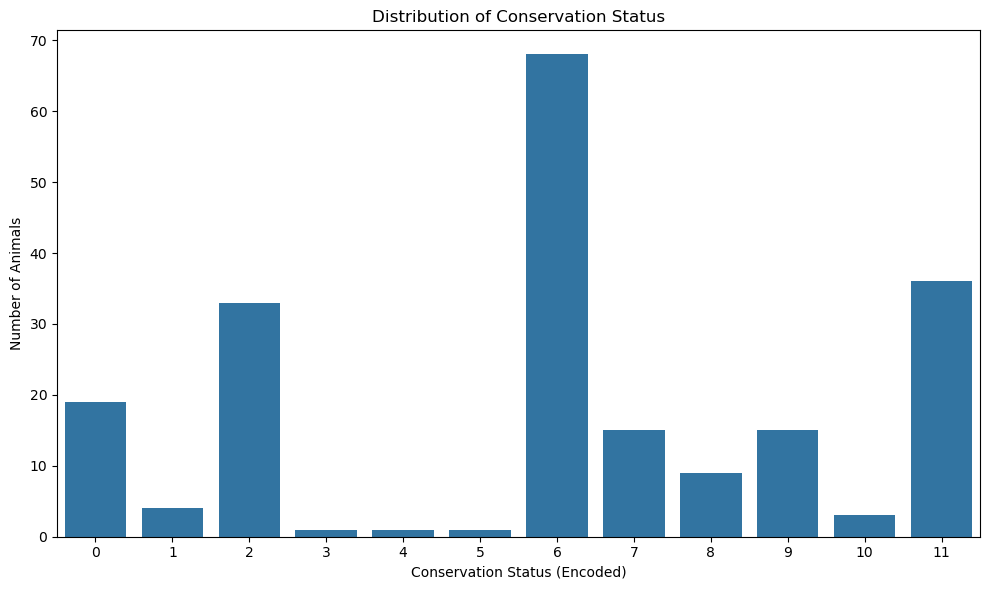

In [27]:
# Distribution of Conservation Status
plt.figure(figsize=(10, 6))
sns.countplot(x="Conservation Status", data=df)
plt.title("Distribution of Conservation Status")
plt.xlabel("Conservation Status (Encoded)")
plt.ylabel("Number of Animals")
plt.tight_layout()
plt.show()

# Pairplot of Key Features

We visualized relationships between key animal features using a pairplot, helping to identify potential correlations and patterns. This insight supports further analysis and feature selection for predictive modeling.

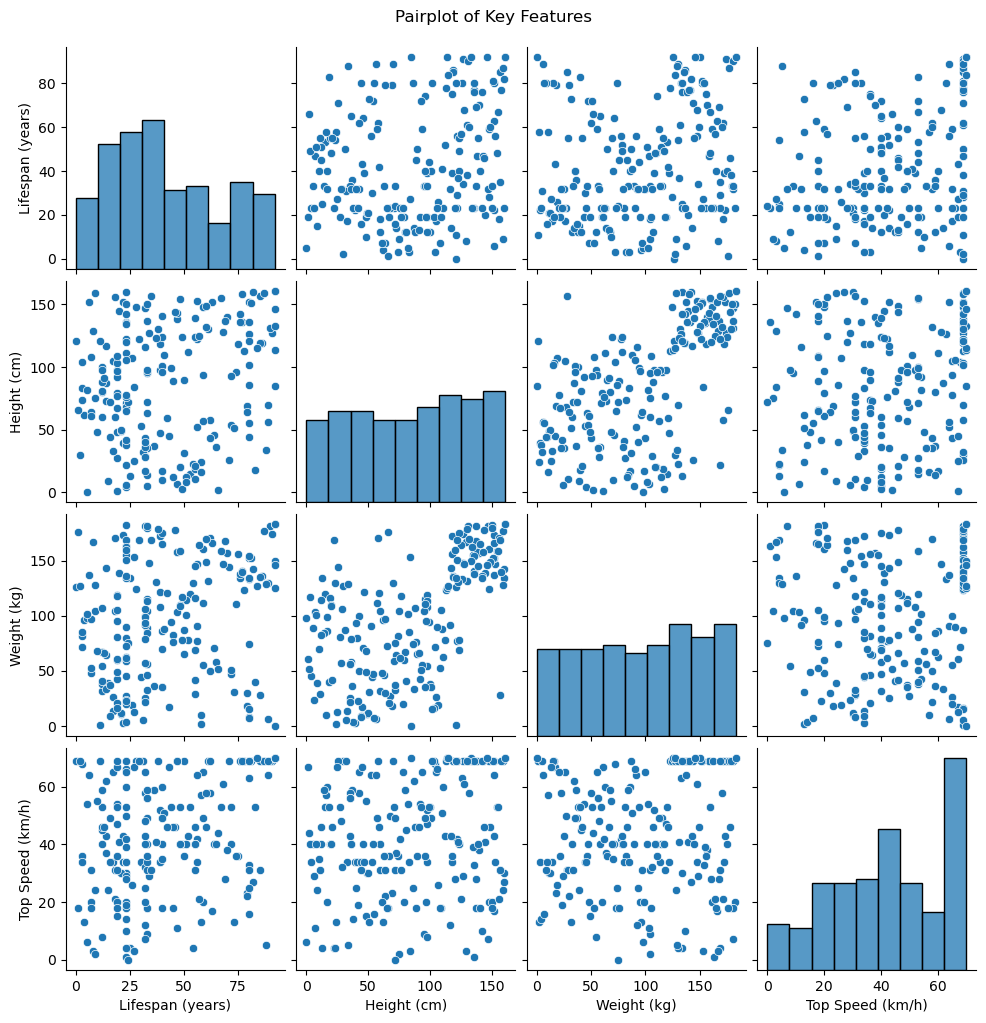

In [ ]:
# Pairplot of Key Features (adjusted to your dataset)
key_features = ["Lifespan (years)", "Height (cm)", "Weight (kg)", "Top Speed (km/h)"]
sns.pairplot(df[key_features])
plt.suptitle("Pairplot of Key Features", y=1.02)
plt.show()

# Conclusion  

This project successfully analyzed and modeled animal-related data using machine learning techniques. We preprocessed the dataset by handling missing values, encoding categorical features, and selecting relevant attributes for classification and regression tasks.  

For conservation status prediction, we explored multiple models, including Logistic Regression, Decision Tree, and SVM, evaluating their performance using accuracy metrics and classification reports. For lifespan prediction, we implemented a regression model, assessing its effectiveness through Mean Squared Error and R² Score.  

Additionally, we visualized data relationships through heatmaps, pair plots, and distribution plots, gaining insights into key patterns and correlations. These visualizations helped refine feature selection and improve model performance.  

Overall, this project demonstrates the importance of data preprocessing, model evaluation, and visualization in extracting meaningful insights. Future enhancements can focus on hyperparameter tuning, deeper feature engineering, and testing advanced machine learning algorithms to improve predictive accuracy.  
